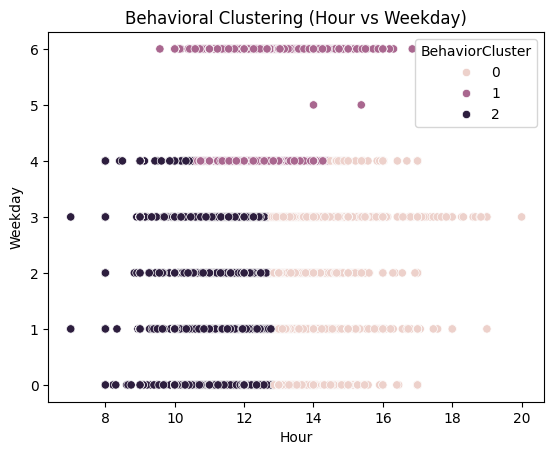

In [1]:
# 📁 notebooks/5_behavioral_clustering.ipynb

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
path = r"E:\c drive\amazon\data\online_retail\online_retail_II.xlsx"
df = pd.read_excel(path, parse_dates=['InvoiceDate'])
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df.dropna(subset=['Customer ID'], inplace=True)

# Extract hour and weekday
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.dayofweek

# Average behavior per customer
behavior = df.groupby('Customer ID').agg({
    'Hour': 'mean',
    'Weekday': lambda x: x.mode()[0]
}).reset_index()

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
behavior['BehaviorCluster'] = kmeans.fit_predict(behavior[['Hour', 'Weekday']])

# Visualize
sns.scatterplot(data=behavior, x='Hour', y='Weekday', hue='BehaviorCluster')
plt.title('Behavioral Clustering (Hour vs Weekday)')
plt.show()

behavior.to_csv('behavioral_segments.csv', index=False)
